In [23]:
import thecypher as cy
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import re
from unidecode import unidecode
from urllib.request import urlopen
import requests
import time
import lyricsgenius
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import csv
import matplotlib.pyplot as plt
import random
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import logging
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
import sklearn


In [2]:
df_wordCount = pd.read_csv("data.csv")

print(df_wordCount.genre.unique())


subset = df_wordCount[df_wordCount.genre=='metal']

print(subset)


['pop' 'death-metal' 'rock' 'r&b/soul' 'hip-hop/rap' 'alternative' 'metal'
 'punk' 'pop/rock']
      Unnamed: 0        artist                  song  \
853          853     Metallica     The Unforgiven II   
854          854     Metallica         My Apocalypse   
855          855     Metallica     Spit Out the Bone   
856          856     Metallica  Nothing Else Matters   
857          857     Metallica       Hero of the Day   
...          ...           ...                   ...   
3014        3014  Machine Head         From This Day   
3015        3015  Machine Head            Slanderous   
3016        3016  Machine Head                  Halo   
3017        3017  Machine Head            Now We Die   
3018        3018  Machine Head             Game Over   

                                                 lyrics  genre  lyric_count  \
853   lay beside tell done speak words hear make dem...  metal          105   
854   claustrophobic crawl skin heart explosive reac...  metal          12

In [3]:
from sklearn.utils import shuffle

df_wordCount.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

genres = ['pop','death-metal','rock','r&b/soul','hip-hop/rap','alternative','metal','punk','pop/rock',]


N = 290 # number of records to pull from each genre
RANDOM_SEED = 200 # random seed to make results repeatable

train_df = pd.DataFrame()
test_df = pd.DataFrame()
for g in genres: # loop over each genre
    subset = df_wordCount[df_wordCount.genre == g] # create subset
    print(len(subset))
    train_set = subset.sample(n=N, random_state=RANDOM_SEED)
    test_set = subset.drop(train_set.index)
    train_df = train_df.append(train_set) # append subsets to the master sets
    test_df = test_df.append(test_set)
    
train_df = shuffle(train_df)
test_df = shuffle(test_df)

462
341
441
380
297
358
303
352
348


In [4]:
print(train_df.genre.unique())
print(train_df.head(10))

['alternative' 'r&b/soul' 'punk' 'rock' 'metal' 'pop/rock' 'hip-hop/rap'
 'pop' 'death-metal']
      Unnamed: 0               artist                        song  \
2239        2239         Foo Fighters                     My Hero   
1865        1865            Sam Smith  I m Ready with Demi Lovato   
3126        3126            blink 182        All the Small Things   
2515        2515              Genesis    The Colony of Slippermen   
3009        3009         Machine Head                    Volatile   
2746        2746          OneRepublic                    Preacher   
2618        2618  The Notorious B I G            Machine Gun Funk   
1211        1211                Queen              Under Pressure   
698          698                AC DC        Givin the Dog a Bone   
2610        2610                  Nas                      We Are   

                                                 lyrics        genre  \
2239  alarming talk pictures shake truth consequence...  alternative   
1

**Train a model using word frequencies and sklearn's CountVectorizer. The CountVectorizer is a quick and dirty way to train a language model by using simple word counts. Later we'll try a more sophisticated approach with the TfidfVectorizer**

0.45982142857142855
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


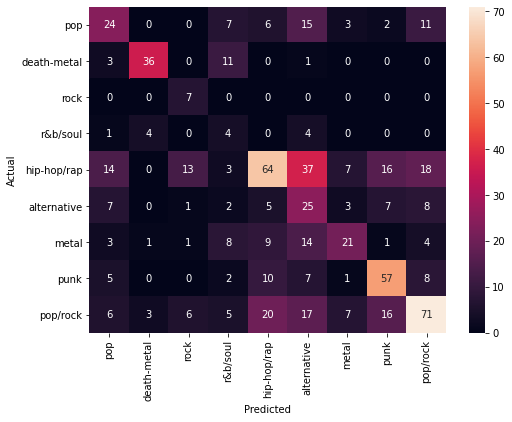

In [40]:

# define our model
wordCount_clf = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
wordCount_clf.fit(train_df.lyrics, train_df.genre)  

# score our model on testing data
predicted = wordCount_clf.predict(test_df.lyrics)
print(np.mean(predicted == test_df.genre))

print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0.49404761904761907
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


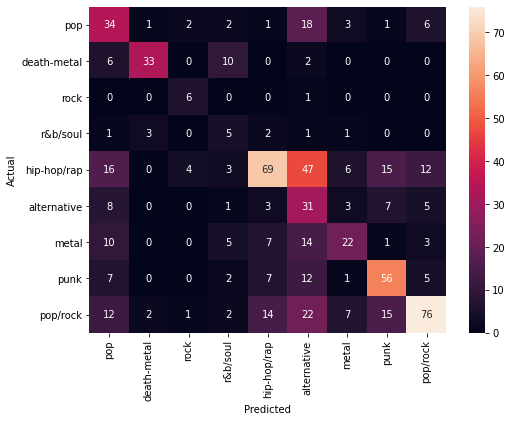

In [41]:
# define our model
wordCount_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', BernoulliNB(alpha=0.1))])

# train our model on training data
wordCount_clf.fit(train_df.lyrics, train_df.genre)  

# score our model on testing data
predicted = wordCount_clf.predict(test_df.lyrics)
print(np.mean(predicted == test_df.genre))

print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


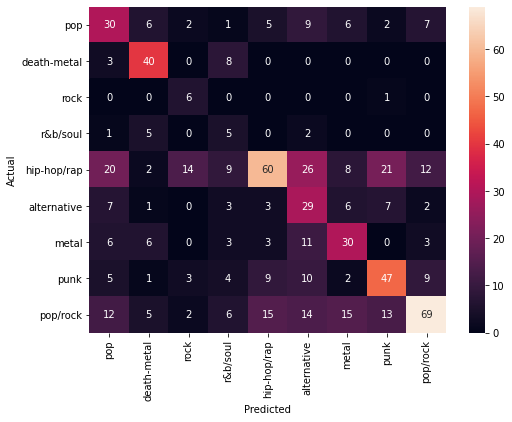

In [42]:


# define our model
text_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', LogisticRegression(solver="liblinear", multi_class="ovr"))])

# train our model on training data
text_clf.fit(train_df.lyrics, train_df.genre)  

# core our model on testing data
predicted = text_clf.predict(test_df.lyrics)
np.mean(predicted == test_df.genre)

print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


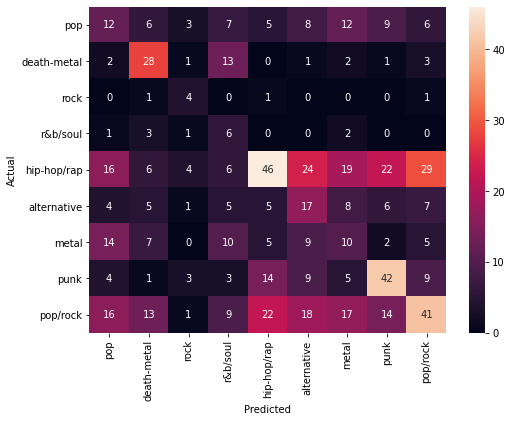

In [43]:
# define our model
text_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', DecisionTreeClassifier())])

# train our model on training data
text_clf.fit(train_df.lyrics, train_df.genre)  

# core our model on testing data
predicted = text_clf.predict(test_df.lyrics)
np.mean(predicted == test_df.genre)

print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
# define our model
text_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', MLPClassifier())])

# train our model on training data
text_clf.fit(train_df.lyrics, train_df.genre)  

# core our model on testing data
predicted = text_clf.predict(test_df.lyrics)
np.mean(predicted == test_df.genre)



0.47470238095238093

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


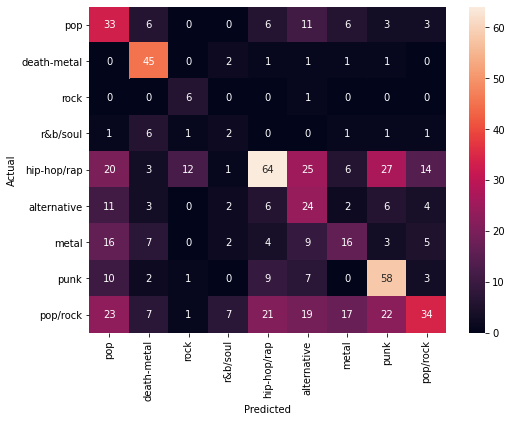

In [39]:
print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


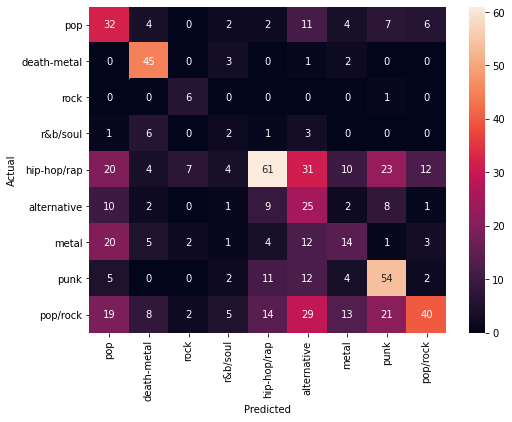

In [44]:
# define our model
text_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', RandomForestClassifier(n_estimators=100,max_features="sqrt"))])

# train our model on training data
text_clf.fit(train_df.lyrics, train_df.genre)  

# core our model on testing data
predicted = text_clf.predict(test_df.lyrics)
np.mean(predicted == test_df.genre)

print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'list'>


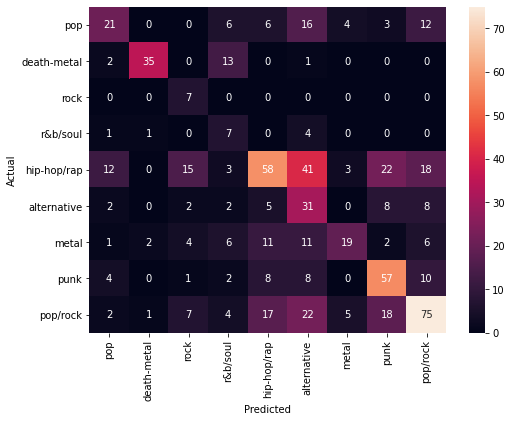

In [45]:
# define our model
text_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
text_clf.fit(train_df.lyrics, train_df.genre)  

# core our model on testing data
predicted = text_clf.predict(test_df.lyrics)
np.mean(predicted == test_df.genre)

print(type(predicted))

print(type(test_df.genre))

print(type(test_df))

predicted_list = predicted.tolist()
print(type(predicted_list))

genre_list = test_df.genre.tolist()
print(type(genre_list))

conf_mat = confusion_matrix(genre_list, predicted)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=genres, yticklabels=genres)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

stop = list(set(stopwords.words('english'))) # stopwords
wnl = WordNetLemmatizer() # lemmatizer

def tokenizer(x): # custom tokenizer
    return (
        wnl.lemmatize(w) 
        for w in word_tokenize(x) 
        if len(w)==2 and w.isalnum() # only words that are  2 characters
    )                                 # and is alpha-numeric

# define our model
text_clf = Pipeline(
    [('vect', TfidfVectorizer(
        ngram_range=(1, 2), # include bigrams
        tokenizer=tokenizer,
        stop_words=stop,
        max_df=0.4, # ignore terms that appear in more than 40% of documents
        min_df=4)), # ignore terms that appear in less than 4 documents
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
text_clf.fit(train_df.lyrics, train_df.genre)  

# score our model on testing data
predicted = text_clf.predict(test_df.lyrics)
np.mean(predicted == test_df.genre)

c:\users\josha\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0.1488095238095238

**Well the accuracy is not high, but good start**

In [14]:
df = pd.read_csv("lyrcisVec&Genre_only.csv")
print(df.head(10))
print(df.index)

  Unnamed: 0         0         1         2         3         4         5  \
0        pop -0.034629 -0.067963  0.069235 -0.042588 -0.065489  0.029289   
1        pop -0.061408 -0.069197  0.061201  0.050199 -0.019850 -0.033546   
2        pop -0.039916 -0.044595  0.013519 -0.058858 -0.032305 -0.052050   
3        pop -0.001811 -0.000001  0.024851  0.030089 -0.024987 -0.062170   
4        pop -0.001963 -0.039135 -0.011527  0.025387 -0.006315  0.007541   
5        pop -0.059922 -0.061264  0.062284  0.059680 -0.052203 -0.047218   
6        pop -0.007013 -0.072376 -0.066359  0.038720 -0.054151 -0.046476   
7        pop  0.004870 -0.055279  0.061035  0.007988 -0.012775 -0.052248   
8        pop  0.007114 -0.059523  0.058985  0.050068 -0.036469 -0.058044   
9        pop -0.021379 -0.063510  0.029503  0.061463 -0.036552 -0.008131   

          6         7         8  ...       502       503       504       505  \
0  0.044530 -0.021600 -0.025340  ...  0.001767 -0.068704  0.042984 -0.046591   
1  

In [15]:
# print(df.mean(axis = 0))

genre_mean = np.array(df.mean(axis = 0))

a = np.array(df.iloc[0])

a = np.delete(a,0)

print(a)
# print(df.iloc[0].astype(float))




[-0.03462914377450943 -0.06796256452798842 0.06923465430736543
 -0.04258839413523674 -0.06548874080181122 0.029288625344634056
 0.04453044757246971 -0.021599812433123592 -0.02533990703523159
 -0.06388705223798752 0.04576509073376656 0.009967030957341194
 0.016217440366745 -0.04426725953817368 0.033411882817745216
 -0.06873811036348343 -0.06816203147172928 0.05381111055612564
 0.015437314286828041 -0.0558173805475235 -0.027449609711766243
 0.0040187109261751175 0.05352984741330147 -0.04385388642549515
 -0.06925974786281586 0.04875700920820236 0.04762130230665207
 0.04377871751785278 0.04609393700957298 0.033854592591524124
 0.04363492131233215 -0.024636369198560715 0.04799265414476395
 0.01922309957444668 -0.05456623435020447 0.06532098352909088
 -0.0030587064102292057 0.006507018581032753 0.0002682261110749096
 0.06889160722494125 0.0134216770529747 0.0033326291013509035
 -0.04373688623309136 -0.001722192973829806 0.0012402103748172524
 -0.028333382681012157 0.018782006576657292 0.0644

In [16]:


cos_list = []
df_cosine = pd.DataFrame([])
for i in range(len (df_wordCount)):
    a = np.array(df.iloc[i])
    a = np.delete(a,0)
    cos_sim=cosine_similarity(a.reshape(1,-1),genre_mean.reshape(1,-1))
    cos_sim = cos_sim.flatten()
    cos_list.append(cos_sim)
#     df_cosine = df_cosine.append(pd.DataFrame([cos_sim], index=[df_wordCount.genre[0]]), ignore_index=True)

print(len(cos_list))
print(len(df_wordCount.genre))

df_cosine['Genre'] = df_wordCount.genre
df_cosine['Cosine Similarity'] = cos_list

print(df_cosine.head())

       


3282
3282
  Genre     Cosine Similarity
0   pop  [0.5782835254070084]
1   pop  [0.7214075516920317]
2   pop  [0.5137022403699649]
3   pop  [0.6415318392028322]
4   pop   [0.566566410976598]


In [17]:
print(df_cosine)

         Genre      Cosine Similarity
0          pop   [0.5782835254070084]
1          pop   [0.7214075516920317]
2          pop   [0.5137022403699649]
3          pop   [0.6415318392028322]
4          pop    [0.566566410976598]
...        ...                    ...
3283  r&b/soul  [0.49355295568162294]
3284  r&b/soul   [0.6368299903351874]
3285  r&b/soul   [0.6717994257457804]
3286  r&b/soul   [0.5686548794267545]
3287  r&b/soul   [0.5797789466011247]

[3282 rows x 2 columns]
